In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

warnings.filterwarnings('ignore')


In [2]:
file_path = r'/content/drive/MyDrive/Data.csv'
loan_data = pd.read_csv(file_path)

In [3]:
print("The shape =", loan_data.shape)
print(loan_data.info())
loan_data.describe()

The shape = (614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Figure size 2500x1200 with 0 Axes>

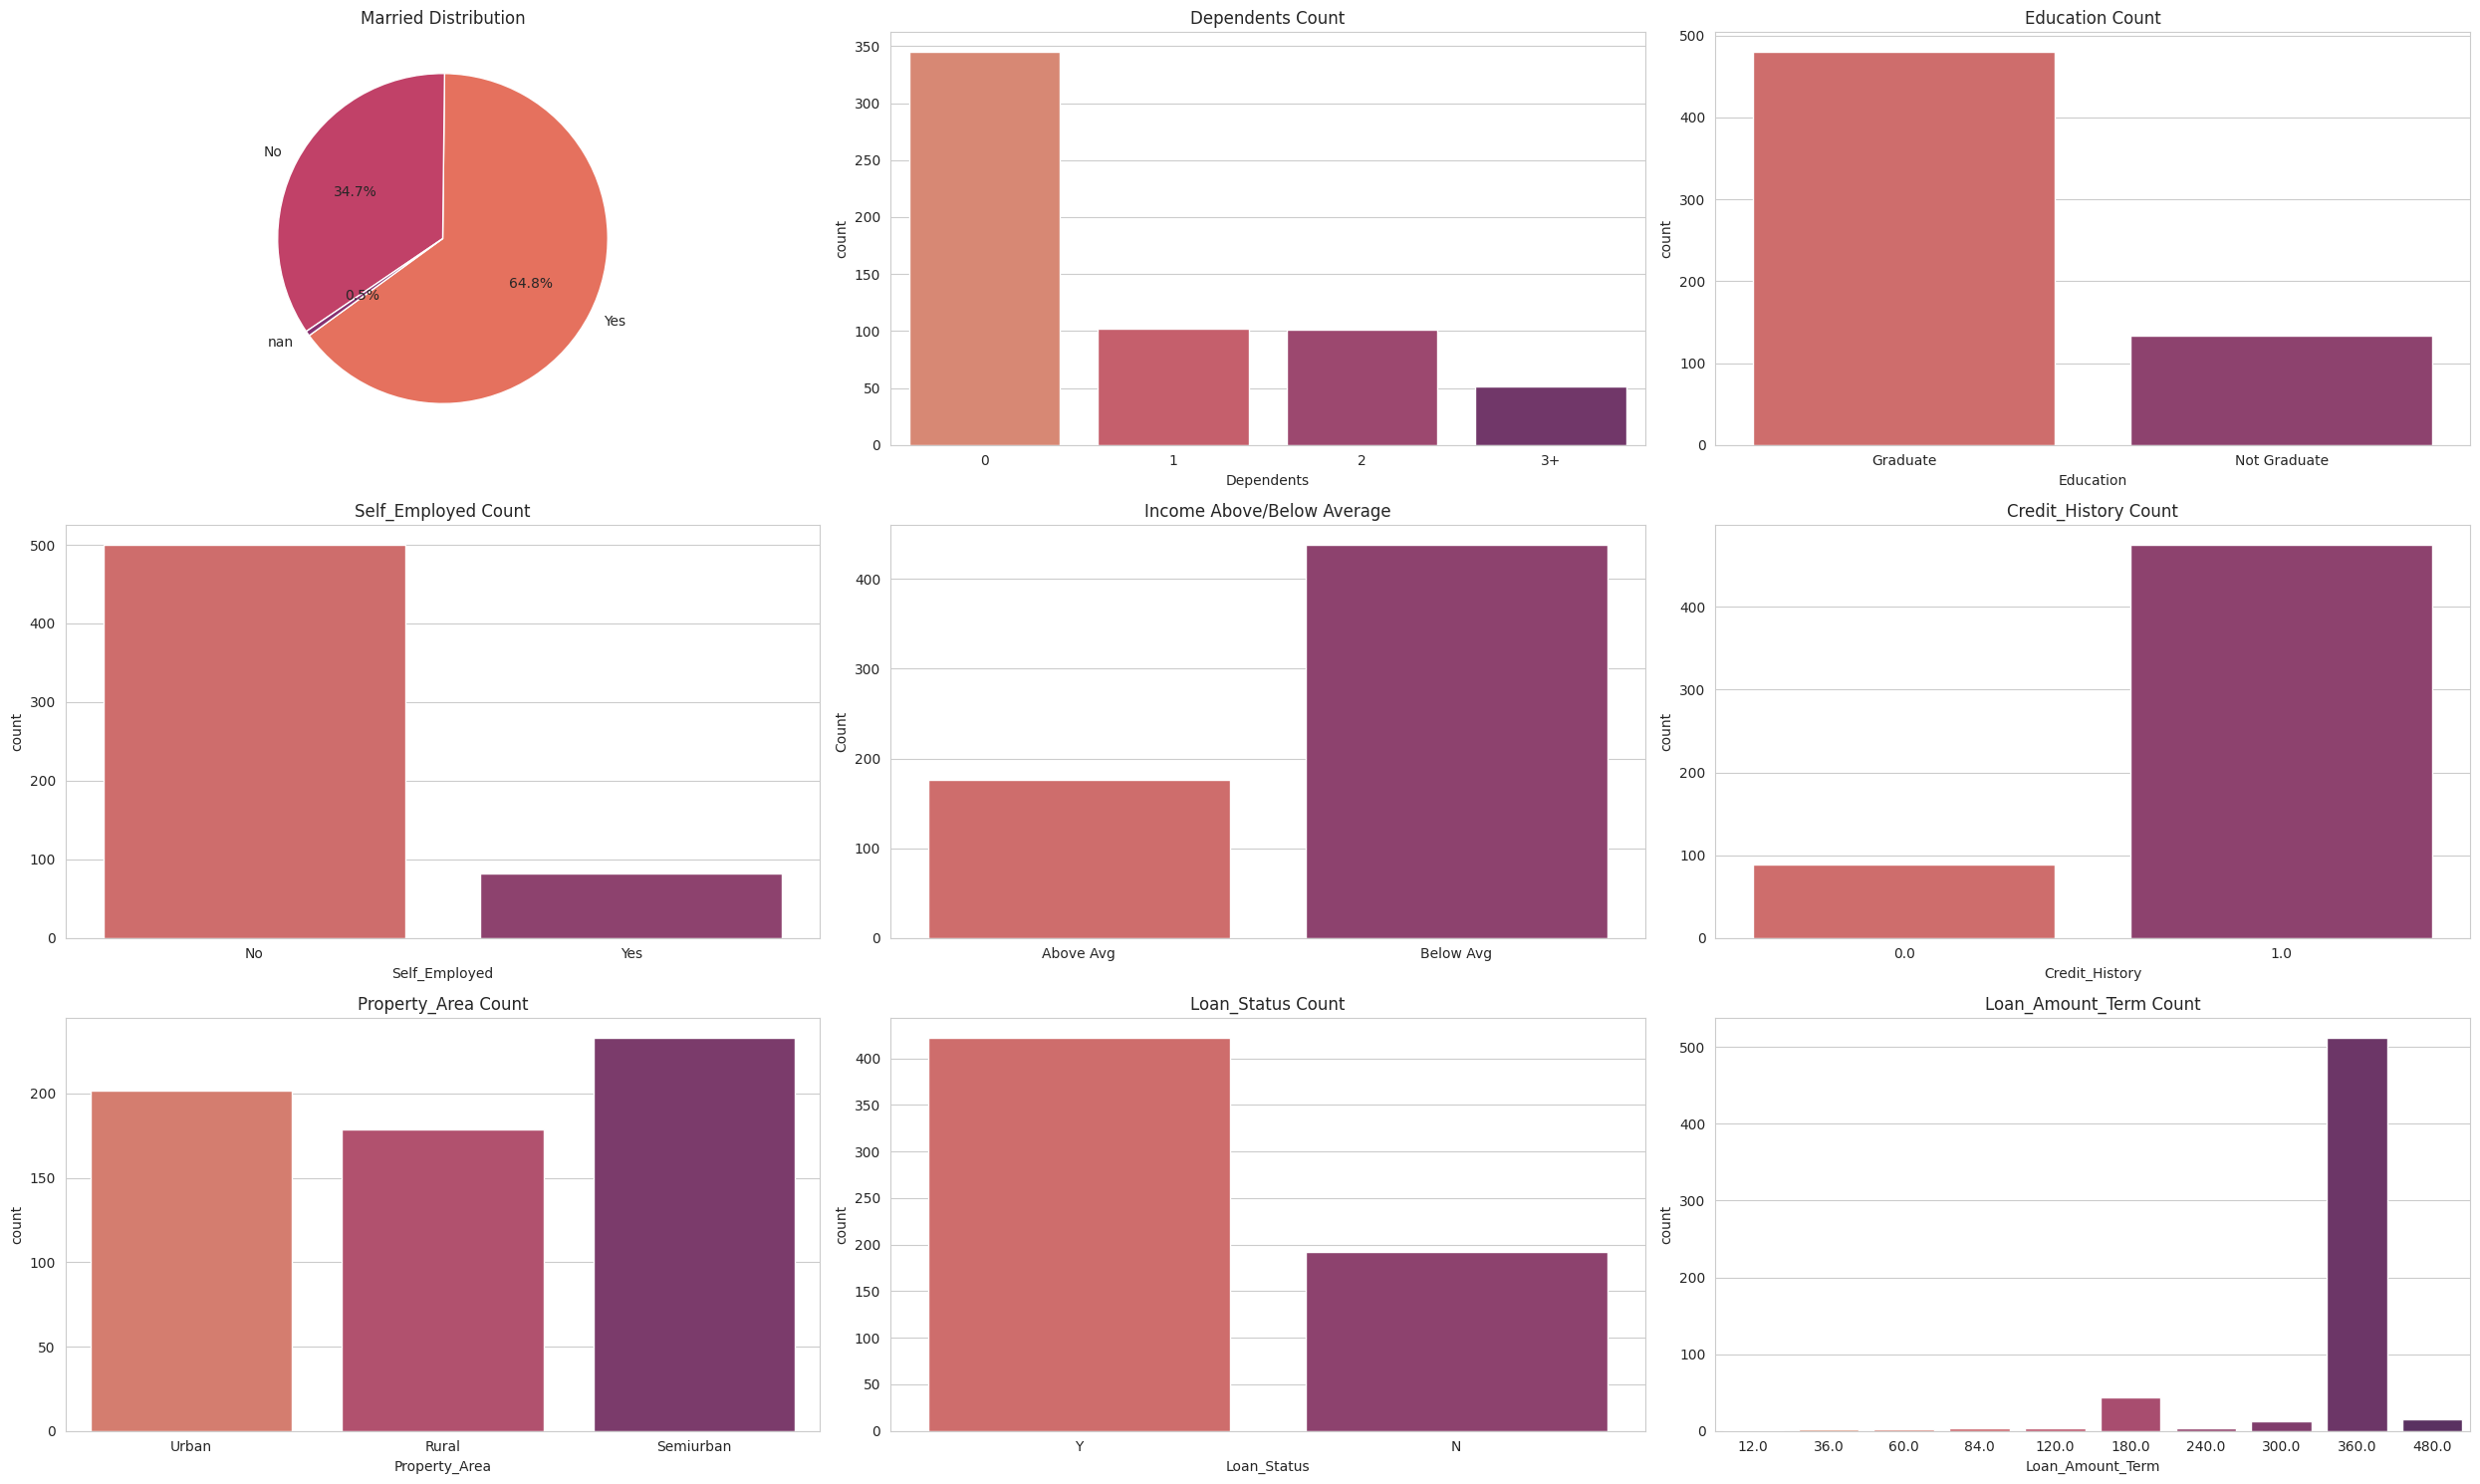

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(25, 12))

features = [
    ('Married', 'pie'),
    ('Dependents', 'count'),
    ('Education', 'count'),
    ('Self_Employed', 'count'),
    ('ApplicantIncome', 'bar'),
    ('Credit_History', 'count'),
    ('Property_Area', 'count'),
    ('Loan_Status', 'count'),
    ('Loan_Amount_Term', 'count')
]

n_rows = 3
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 15))
axes = axes.flatten()

for i, (feature, ftype) in enumerate(features):
    ax = axes[i]

    if ftype == 'pie':
        counts = loan_data[feature].value_counts(dropna=False)
        ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=216,
               colors=sns.color_palette("flare", len(counts)))
        ax.set_title(f'{feature} Distribution')

    elif ftype == 'count':
        sns.countplot(x=feature, data=loan_data, palette="flare", ax=ax)
        ax.set_title(f'{feature} Count')

    elif ftype == 'bar' and feature == 'ApplicantIncome':
        avg_income = loan_data['ApplicantIncome'].mean()
        above_avg = (loan_data['ApplicantIncome'] > avg_income).sum()
        below_avg = (loan_data['ApplicantIncome'] <= avg_income).sum()
        sns.barplot(x=['Above Avg', 'Below Avg'], y=[above_avg, below_avg], palette="flare", ax=ax)
        ax.set_title('Income Above/Below Average')
        ax.set_ylabel('Count')

for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


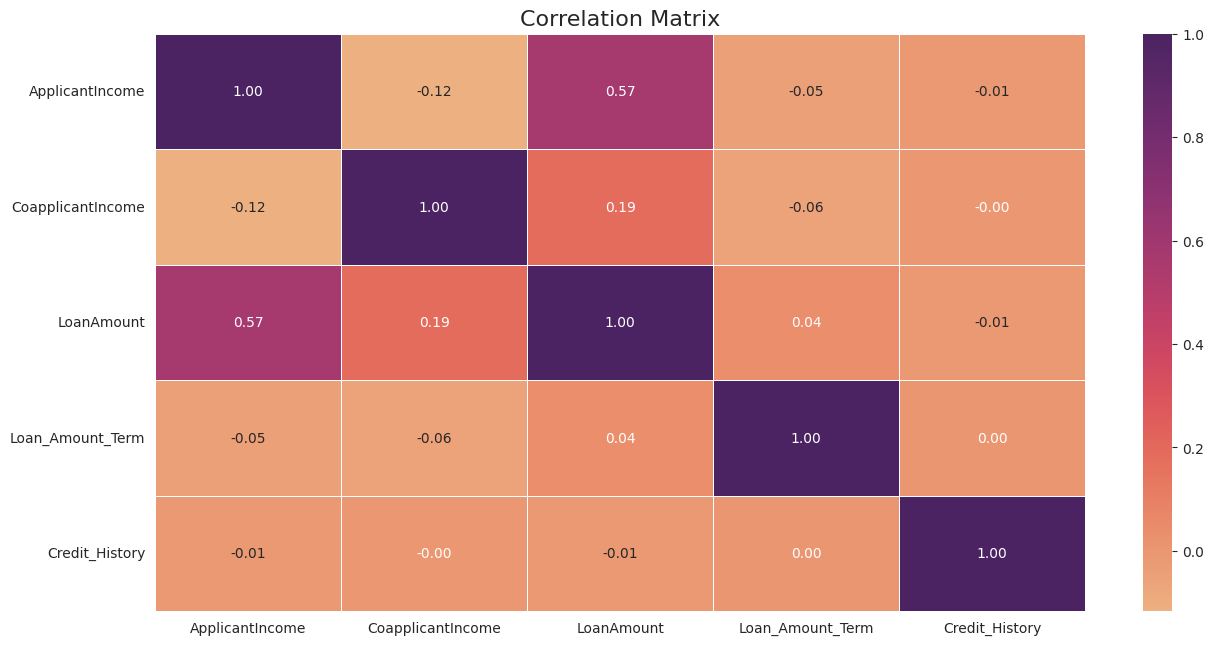

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = loan_data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(15, 7.5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="flare", linewidths=0.5, cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()


Data Relationship Analysis


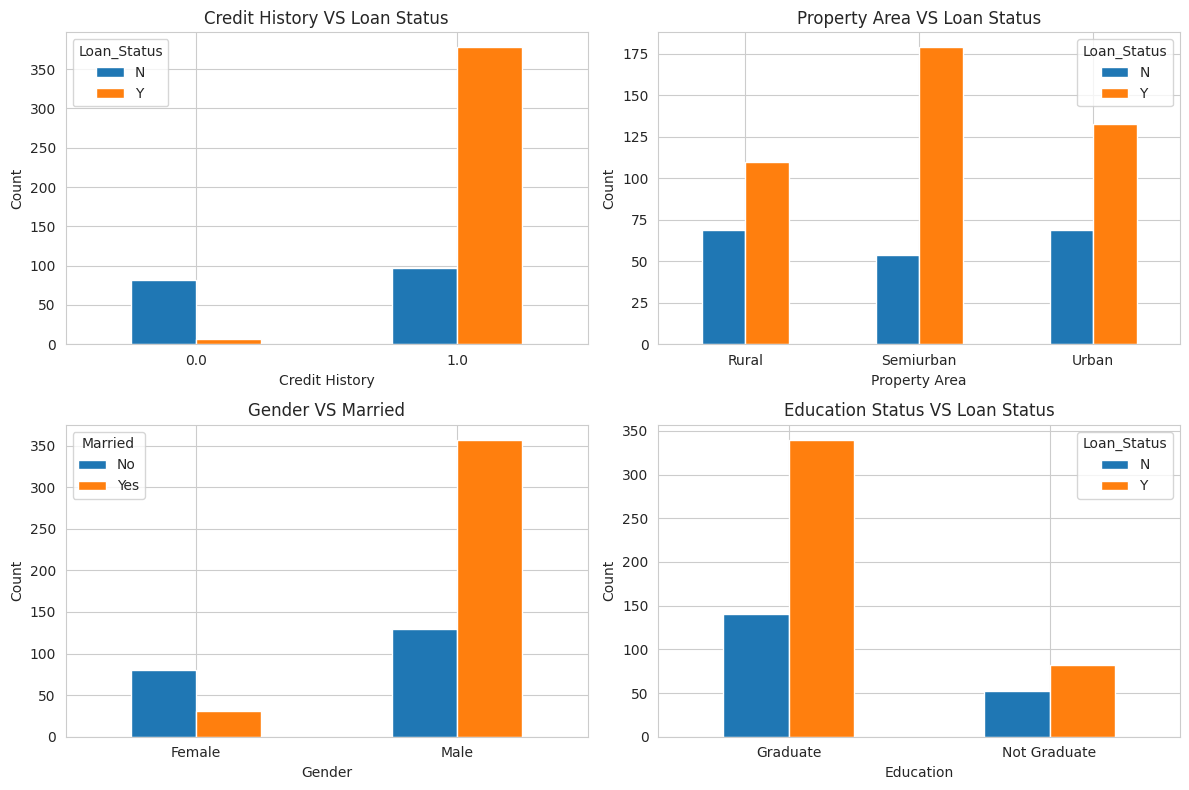

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

pd.crosstab(loan_data.Credit_History, loan_data.Loan_Status).plot(kind="bar", ax=axes[0])
axes[0].set_title('Credit History VS Loan Status')
axes[0].set_xlabel('Credit History')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

pd.crosstab(loan_data.Property_Area, loan_data.Loan_Status).plot(kind="bar", ax=axes[1])
axes[1].set_title('Property Area VS Loan Status')
axes[1].set_xlabel('Property Area')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=0)

pd.crosstab(loan_data.Gender, loan_data.Married).plot(kind="bar", ax=axes[2])
axes[2].set_title('Gender VS Married')
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=0)

pd.crosstab(loan_data.Education, loan_data.Loan_Status).plot(kind="bar", ax=axes[3])
axes[3].set_title('Education Status VS Loan Status')
axes[3].set_xlabel('Education')
axes[3].set_ylabel('Count')
axes[3].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


In [7]:
loan_data.drop(['Loan_ID'], axis = 1 , inplace = True)
print(loan_data.info())



null_counts = loan_data.isnull().sum()
print(null_counts)

loan_data["Credit_History"] = loan_data["Credit_History"].fillna(loan_data["Credit_History"].mode()[0])
loan_data["Loan_Amount_Term"] = loan_data["Loan_Amount_Term"].fillna(loan_data["Loan_Amount_Term"].mode()[0])




loan_data["Gender"] = loan_data["Gender"].fillna(loan_data["Gender"].mode()[0])
loan_data["LoanAmount"] = loan_data["LoanAmount"].fillna(loan_data["LoanAmount"].mean())
loan_data["Married"] = loan_data["Married"].fillna(loan_data["Married"].mode()[0])
loan_data["Dependents"] = loan_data["Dependents"].fillna(loan_data["Dependents"].mode()[0])
loan_data["Self_Employed"] = loan_data["Self_Employed"].fillna(loan_data["Self_Employed"].mode()[0])


null_counts = loan_data.isnull().sum()
print(null_counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB
None
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
Coapplicant

In [8]:
# Normalize column names
loan_data.columns = loan_data.columns.str.strip().str.replace(' ', '_')

# Apply one-hot encoding
loan_data = pd.get_dummies(loan_data)

# Drop one category from each binary pair (to avoid redundancy)
loan_data = loan_data.drop(['Gender_Female',
                            'Married_No',
                            'Education_Not_Graduate',
                            'Self_Employed_No',
                            'Loan_Status_N'], axis=1, errors='ignore')

# Rename for simplicity
newColunmsNames = {
    'Gender_Male': 'Gender',
    'Married_Yes': 'Married',
    'Education_Graduate': 'Education',
    'Self_Employed_Yes': 'Self_Employed',
    'Loan_Status_Y': 'Loan_Status'
}

loan_data.rename(columns=newColunmsNames, inplace=True)

# Print the result
print("Final Columns:")
for col in loan_data.columns:
    print("-", col)

print("\nShape:", loan_data.shape)
print("\nLoan_Status sample:\n", loan_data['Loan_Status'].head())


Final Columns:
- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Loan_Amount_Term
- Credit_History
- Gender
- Married
- Dependents_0
- Dependents_1
- Dependents_2
- Dependents_3+
- Education
- Education_Not Graduate
- Self_Employed
- Property_Area_Rural
- Property_Area_Semiurban
- Property_Area_Urban
- Loan_Status

Shape: (614, 18)

Loan_Status sample:
 0     True
1    False
2     True
3     True
4     True
Name: Loan_Status, dtype: bool


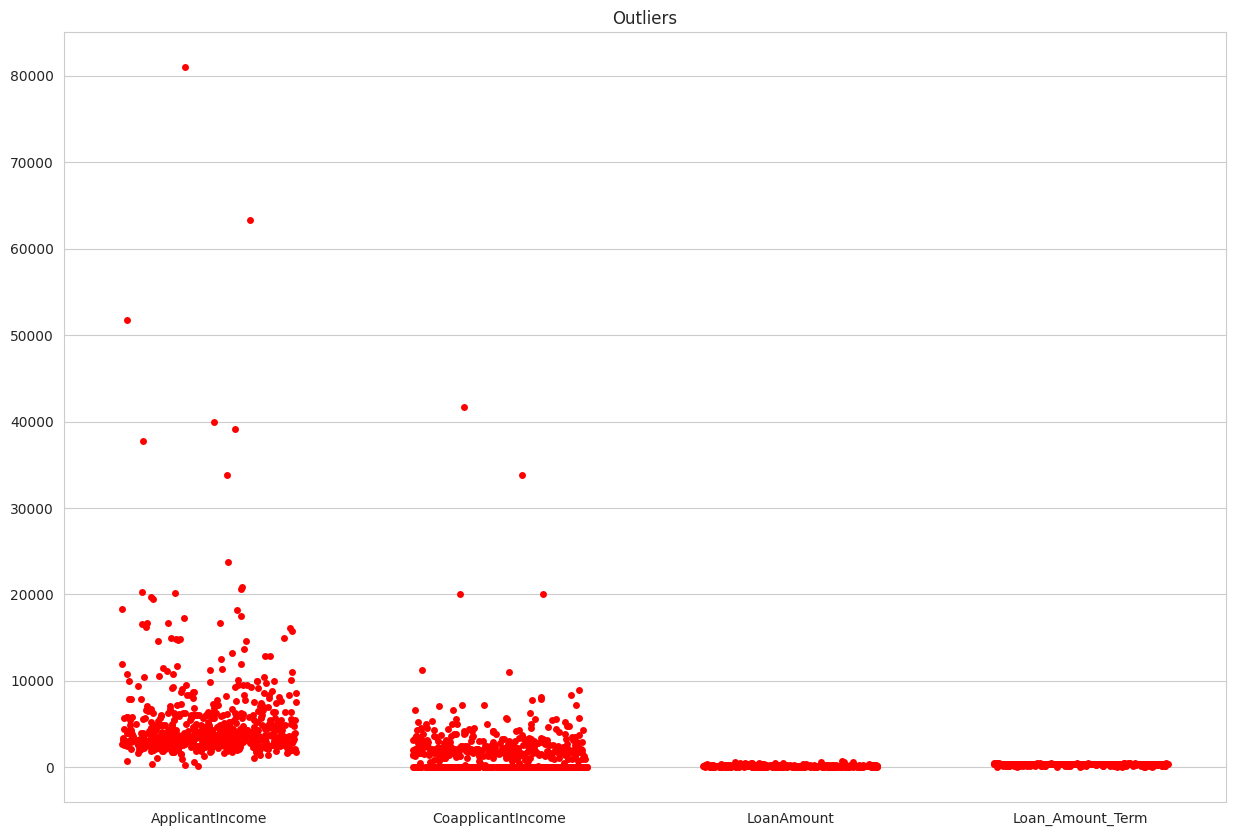

In [9]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Only variables that have outliers
outliersColumns = loan_data.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"])

# Add outliers to the plot
sns.stripplot(data=outliersColumns, color="red", jitter=0.3, size=5)

# Set the axis labels and title
plt.title("Outliers")

# Show the plot
plt.show()

In [10]:
#import Robust Scaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
loan_data[['ApplicantIncome', 'CoapplicantIncome']] = scaler.fit_transform(loan_data[['ApplicantIncome', 'CoapplicantIncome']])
print(loan_data.shape)

(614, 18)


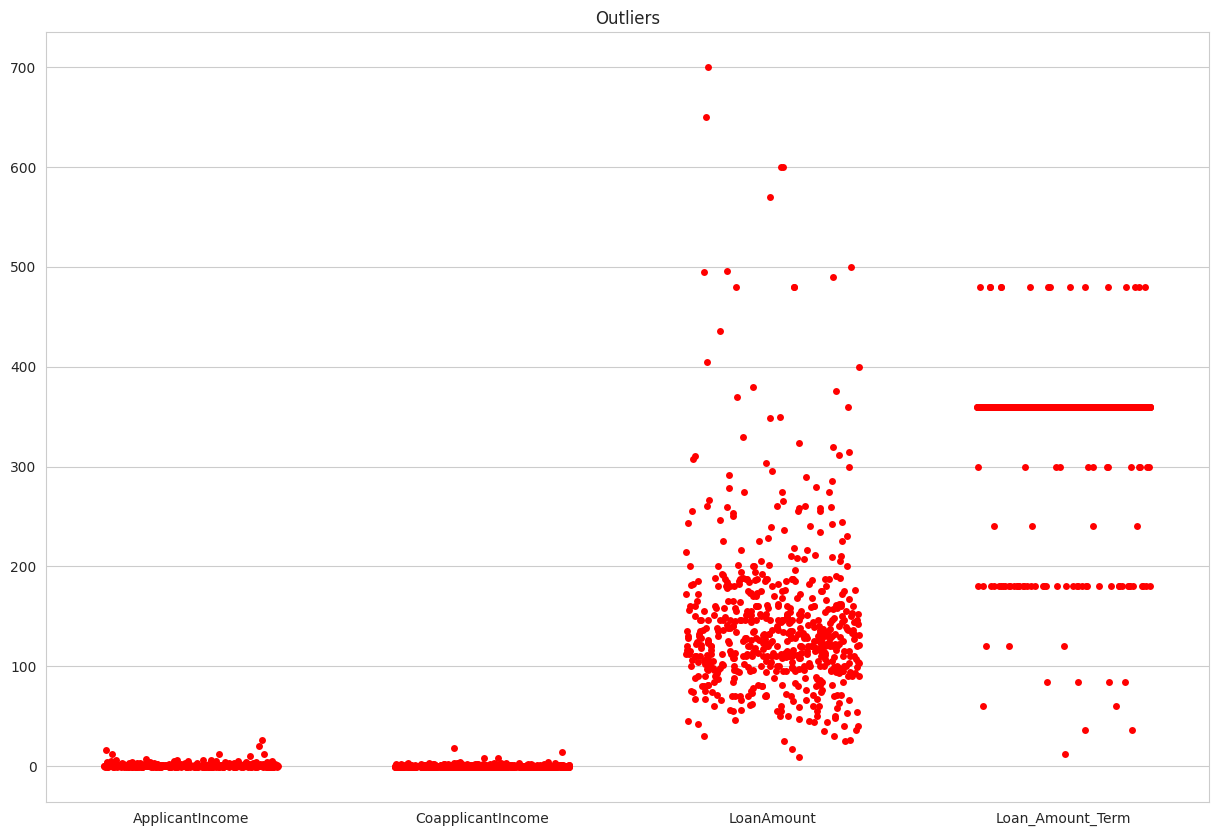

In [11]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Only variables that have outliers
outliersColumns = loan_data.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"])

# Add outliers to the plot
sns.stripplot(data=outliersColumns, color="red", jitter=0.3, size=5)

# Set the axis labels and title
plt.title("Outliers")

# Show the plot
plt.show()

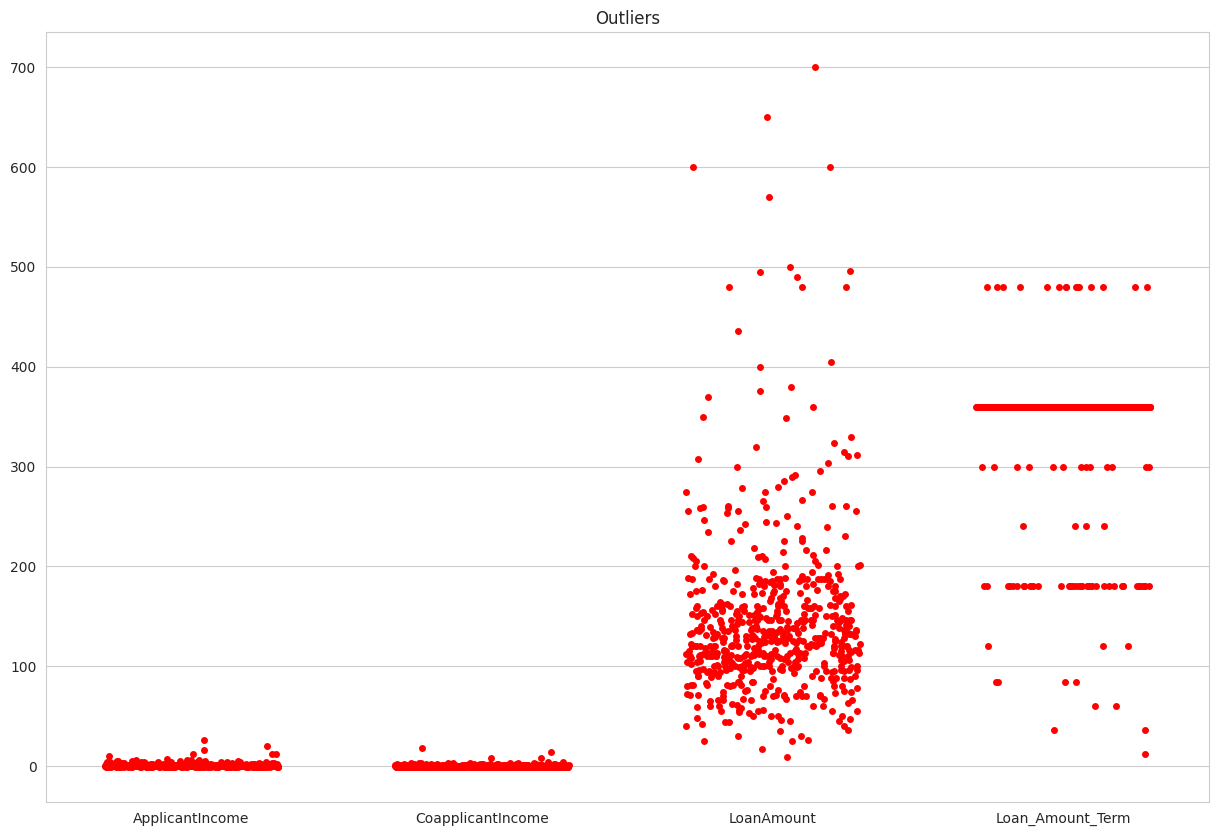

In [12]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Only variables that have outliers
outliersColumns = loan_data.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"])

# Add outliers to the plot
sns.stripplot(data=outliersColumns, color="red", jitter=0.3, size=5)

# Set the axis labels and title
plt.title("Outliers")

# Show the plot
plt.show()


In [13]:
# List of column names to check for duplicates (Numerical values)
columns_to_check = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Iterate over each column name
for column_name in columns_to_check:
    # Checking for duplicate entries in the current column
    duplicate_count = loan_data[column_name].duplicated().sum()

    # Output the result with a descriptive message
    if duplicate_count == 0:
        print(f"No duplicate entries found in the {column_name} column.")
    else:
        print(f"Number of duplicate entries found in the {column_name} column: {duplicate_count}")


Number of duplicate entries found in the ApplicantIncome column: 109
Number of duplicate entries found in the CoapplicantIncome column: 327
Number of duplicate entries found in the LoanAmount column: 410
Number of duplicate entries found in the Loan_Amount_Term column: 604
Number of duplicate entries found in the Credit_History column: 612


In [14]:
X = loan_data.drop(columns=['Loan_Status'])
Y = loan_data['Loan_Status']
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (614, 17)
Shape of Y: (614,)


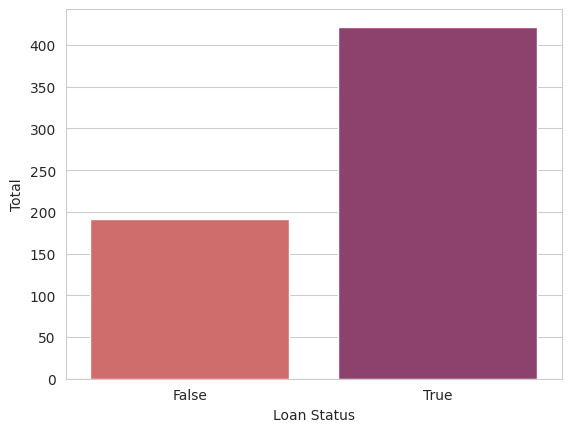

In [15]:
sns.countplot(x=Y, data=loan_data, palette="flare")
plt.ylabel('Total')
plt.xlabel('Loan Status')
plt.show()

In [16]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (491, 17)
Shape of X_test: (123, 17)
Shape of Y_train: (491,)
Shape of Y_test: (123,)


In [18]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [22]:

scoreListRF_Train = []
scoreListRF_Test = []
for max_dep in range(1, 10):
    for rand_state in range(1, 50):
        for n_est in range(1, 30):
            Model2 = RandomForestClassifier(n_estimators=n_est, random_state=rand_state, max_depth=max_dep)
            Model2.fit(X_train, Y_train)
            scoreListRF_Train.append(Model2.score(X_train, Y_train))
            scoreListRF_Test.append(Model2.score(X_test, Y_test))
RF_Accuracy_Train = max(scoreListRF_Train)
RF_Accuracy_Test = max(scoreListRF_Test)
print(f"Random Forest best accuracy (Training): {RF_Accuracy_Train*100:.2f}%")
print(f"Random Forest best accuracy (Testing): {RF_Accuracy_Test*100:.2f}%")
#print(colored("The Random Forest model has been trained successfully","green", attrs=['reverse']))

Random Forest best accuracy (Training): 93.69%
Random Forest best accuracy (Testing): 86.18%


In [21]:
from sklearn.linear_model import LogisticRegression
scoreListLR_Train = []
scoreListLR_Test = []
for i in range(1, 150):
    for j in range(1, 10):
        Model4= LogisticRegression(random_state=i, solver='saga', max_iter=j)
        Model4.fit(X_train,Y_train)
        scoreListLR_Train.append(Model4.score(X_train, Y_train))
        scoreListLR_Test.append(Model4.score(X_test, Y_test))
LR_Accuracy_Train = max(scoreListLR_Train)
LR_Accuracy_Test = max(scoreListLR_Test)
print(f"Logistic Regression best accuracy (Training): {LR_Accuracy_Train*100:.2f}%")
print(f"Logistic Regression best accuracy (Testing): {LR_Accuracy_Test*100:.2f}%")

Logistic Regression best accuracy (Training): 80.86%
Logistic Regression best accuracy (Testing): 85.37%


In [23]:
import pickle
best_rf_model = RandomForestClassifier(
    n_estimators=29,
    random_state=42,
    max_depth=9
)
best_rf_model.fit(X_train, Y_train)

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

print("✅ Random Forest model saved successfully as random_forest_model.pkl")


✅ Random Forest model saved successfully as random_forest_model.pkl
